# Clean and Analyze Employee Exit Surveys

In this project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

Below is a preview of a couple columns we'll work with from the dete_survey.csv:

* ID: An id used to identify the participant of the survey
* SeparationType: The reason why the person's employment ended
* Cease Date: The year or month the person's employment ended
* DETE Start Date: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the tafe_survey.csv:

* Record ID: An id used to identify the participant of the survey
* Reason for ceasing employment: The reason why the person's employment ended
* LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)

**We will try to answer the following questions:**

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?


## Exploring the datasets

We will work with the following two dataframes: 
* *dete_survey* (Training and Employment (DETE)).
* *tafe_survey* (Technical and Further Education (TAFE)).

In [1]:
%matplotlib inline

In [2]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Reading the data
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')
pd.options.display.max_columns = 150 # in order to avoid truncated output 

In [4]:
dete_survey.info() # quick inspect of null values, checking columns, and reviewing data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [5]:
dete_survey.head() # show the first five rows.

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [6]:
tafe_survey.info() # quick inspect of null values, checking columns, and reviewing data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [7]:
tafe_survey.head() # show the first five rows.

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

**Observations from the quick inspection from above:**

* In the *dete_survey* dataframe, 'Not Stated' values signify missing data, yet they are not labeled as NaN.
* Numerous columns or responses across the datasets indicate employee resignation due to dissatisfaction.
* Both the *dete_survey* and *tafe_survey* dataframes present numerous columns unnecessary for our analysis.
* Although both dataframes share many common columns, the names of these columns differ.


## Checking for missing values and unnecessary columns

**1. *dete_survey* dataframe:**

First, we need to convert 'Not Stated' values to NaN to ensure pandas interprets them as null values:

In [8]:
dete_survey = pd.read_csv('dete_survey.csv',na_values = 'Not Stated') # Convert the Not Stated values to NAN

In [9]:
dete_survey.head() # Quick inspection.

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [10]:
dete_survey.isnull().sum() # Check the total number of null values per column.

ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

**In summary:**

* The *dete_survey* dataframe has 822 rows and 56 columns.

* The *dete_survey* dataframe presents 8 columns that have more than 100 null values, and 7 columns with more than 350 null values. These values will be addressed in the subsequent steps.

The *dete_survey* dataframe has around 20 columns which we don't need for our analysis:

In [11]:
dete_survey.columns[28:49] # Show unnecesary columns.

Index(['Professional Development', 'Opportunities for promotion',
       'Staff morale', 'Workplace issue', 'Physical environment',
       'Worklife balance', 'Stress and pressure support',
       'Performance of supervisor', 'Peer support', 'Initiative', 'Skills',
       'Coach', 'Career Aspirations', 'Feedback', 'Further PD',
       'Communication', 'My say', 'Information', 'Kept informed',
       'Wellness programs', 'Health & Safety'],
      dtype='object')

In order to make the dataframes easier to work with, we will remove columns from 28 to 48: 

In [12]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49],axis=1) # Drop columns from 28 to 48.

In [13]:
dete_survey_updated.info() # Check the remaining columns after the previous columns removal.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

**2. *tafe_survey* dataframe:**

In [14]:
tafe_survey = pd.read_csv('tafe_survey.csv') # Reading the dataframe

In [15]:
tafe_survey.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [16]:
tafe_null_counts = tafe_survey.isnull().sum() # Count the number of null values in each column of the TAFE survey dataframe

print('Number of columns with more than 250 null values:', tafe_null_counts[tafe_null_counts > 250].count())

max = tafe_null_counts[tafe_null_counts > 250].max() # Find the maximum number of null values and the corresponding column


max_column = tafe_null_counts[tafe_null_counts == max].index[0]

print('\nColumn with the maximum number of null rows:\n"', max_column + '": with ' + str(tafe_null_counts[tafe_null_counts > 250].max()) + ' null values')

# Identify the indexes of columns with more than 250 null values

columns_to_show = tafe_null_counts[tafe_null_counts > 250]
positions = [tafe_survey.columns.get_loc(column) for column in columns_to_show.index]

print('\nIndexes of the columns with more than 250 null values:',positions)


Number of columns with more than 250 null values: 15

Column with the maximum number of null rows:
" Main Factor. Which of these was the main factor for leaving?": with 589 null values

Indexes of the columns with more than 250 null values: [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 49, 51]


In summary:

* The *tafe_survey* dataframe has 702 rows and 72 columns.

* 15 columns of the *tafe_survey* present more than 250 null values.

* The column *Main Factor. Which of these was the main factor for leaving?* is the one with the maximum number of null rows: 589.

As it happened with *dete_survey*, *tafe_survey* provides columns that we won't need for our analysis:

In [17]:
print(tafe_survey.iloc[:,17:66]) # Show tafe_survey's columns that we won't use.

    Main Factor. Which of these was the main factor for leaving?  \
0                                                  NaN             
1                                                  NaN             
2                                                  NaN             
3                                                  NaN             
4                                                  NaN             
..                                                 ...             
697                                                NaN             
698                                                NaN             
699                                                NaN             
700                                                NaN             
701                      Career Move - Self-employment             

    InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction  \
0                                                Agree                                   

We will remove columns from 17 to 65, which correspond to specific questions regarding satisfacion or insatisfaction. This satisfacion/insatisfacion info can be gathered with the remaining rows.

In [18]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66],axis=1) # To discard the columns from 17 to 65.

# Standardize the column names

We eventually want to combine both dataframes. We first will need the same columns for both dataframes to have equal names.

We will use the following criteria to update the column names:
- Make all the capitalization lowercase.
- Remove any trailing whitespace from the end of the strings.
- Replace spaces with underscores ('_').

In [19]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ','_').str.lower().str.strip() # Clean the column names

In [20]:
dete_survey_updated.head() # Check the changes we made on the names.

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


Next, we will create a dictionary using the common columns of tafe_survey and dete_survey. We will use this dictionary to update the column names of tafe_survey in order to present the same names as are shown in dete_survey dataframe:

In [21]:
names_columns_tafe = {'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

In [22]:
tafe_survey_updated = tafe_survey_updated.rename(mapper=names_columns_tafe, axis=1) # We use the rename method and the dictionary to update the name columns of tafe_survey.

In [23]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


## Filter the data

One of our goals is to answer whether employees with a short tenure are resigning due to dissatisfaction, and if the same holds true for those with longer job experience. 

Because we are looking for resignations, we are only going to focus on the resignation types of the *separationtype* column. 

The *separationtype* column in *dete_survey_updated* has three types of resignation recordered: 

* Resignation-Other reasons
* Resignation-Other employer
* Resignation-Move overseas/interstate 

And the *separationtype* column in *tafe_survey_updated* has only a generic value:

* Resignation


In [24]:
dete_survey_updated['separationtype'].value_counts() # Check the unique values and their count in the separationtype column.


Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [25]:
tafe_survey_updated['separationtype'].value_counts() # Check the unique values and their count in the separationtype column.


Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [26]:
dete_resignations = dete_survey_updated[dete_survey_updated.copy()['separationtype'].str.contains('Resignation')] # Select the rows whose separationtype values contain the Resignation word. 

In [27]:
dete_resignations.head() # Quick inspection


,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [28]:
dete_resignations.info() # Quick inspection

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   311 non-null    int64  
 1   separationtype                       311 non-null    object 
 2   cease_date                           300 non-null    object 
 3   dete_start_date                      283 non-null    float64
 4   role_start_date                      271 non-null    float64
 5   position                             308 non-null    object 
 6   classification                       161 non-null    object 
 7   region                               265 non-null    object 
 8   business_unit                        32 non-null     object 
 9   employment_status                    307 non-null    object 
 10  career_move_to_public_sector         311 non-null    bool   
 11  career_move_to_private_sector   

In [29]:
# For tafe_survey_updated we first check the null values in the separationtype column:
rows_with_null_separationtype = tafe_survey_updated[tafe_survey_updated['separationtype'].isnull()]

rows_with_null_separationtype.shape


(1, 23)

tafe_survey_updated contains 23 null values in the *separationtype* column.

In [30]:
# Select the rows whose separationtype values contain the Resignation word.
tafe_resignations = tafe_survey_updated[tafe_survey_updated.copy()['separationtype'].str.contains('Resignation', na=False)]  

In [31]:
tafe_resignations.head() # Quick scanning

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,-,-,-,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [32]:
tafe_resignations.info() # Quick scanning

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 23 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   340 non-null    float64
 1   Institute                                            340 non-null    object 
 2   WorkArea                                             340 non-null    object 
 3   cease_date                                           335 non-null    float64
 4   separationtype                                       340 non-null    object 
 5   Contributing Factors. Career Move - Public Sector    332 non-null    object 
 6   Contributing Factors. Career Move - Private Sector   332 non-null    object 
 7   Contributing Factors. Career Move - Self-employment  332 non-null    object 
 8   Contributing Factors. Ill Health                     332 non-null    o

## Verify the data

We will continue with the cleaning by trying to verify that our data is not corrupted.

First, we will focus on the columns *cease_date* and *dete_start_date*. Since the *cease_date* is the last year of the person's employment, and the *dete_start_date* is the person's first year of employment, it wouldn't make sense for the dataset to present years after the current date. 
Given that most people in this field start working in their 20s, it's also unlikely that the *dete_start_date* shows years before 1940.

In [33]:
dete_resignations['cease_date'].value_counts() # Check the unique values for the 'cease_date' column.

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

We need to modify the structure of some dates, such as *01/2014*, to keep only the year as a float type for all rows.

In [34]:
# We will extract the year for each value in 'cease_date' and convert them to a float type:
dete_resignations['cease_date_year'] = dete_resignations['cease_date'].str.extract(r"(\d{4})").astype(float)

/var/folders/s1/_jzrgjv92z3ggw8vdrsxkxj80000gn/T/ipykernel_28479/1203920003.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dete_resignations['cease_date_year'] = dete_resignations['cease_date'].str.extract(r"(\d{4})").astype(float)


In [35]:
dete_resignations['cease_date_year'].value_counts().sort_index(ascending=True) # Check the unique values

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date_year, dtype: int64

In [36]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True) # Check the unique values

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [37]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending=True) # Check the unique values

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

As a starting point, it's evident that the years in both dataframes lack complete alignment. The *tafe_survey* dataframe includes some cease dates in 2009, which are not present in the *dete_survey* dataframe. Additionally, the *tafe_survey* dataframe has a considerably higher number of cease dates in 2010 compared to the dete_survey_updated dataframe. 

We also can make a fast scanning to check the consistency of start and cease dates. To achieve this, we will create a boxplot for the values of dete_start_date and cease_date from both the dete_resignations and tafe_resignations dataframes. 

<Axes: >

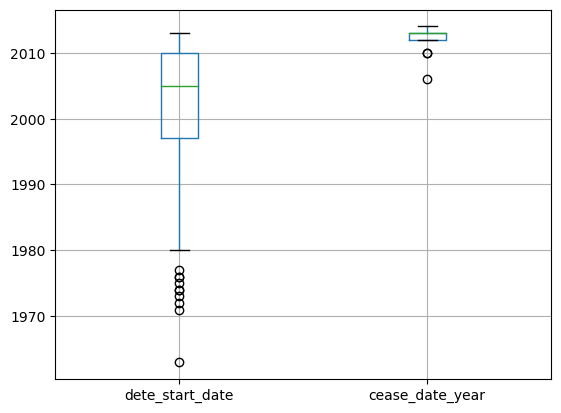

In [38]:
dete_resignations.boxplot(column=['dete_start_date','cease_date_year']) # Create a boxplot with the start and cease dates.


{'whiskers': [<matplotlib.lines.Line2D at 0x7fd1953037f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd195303df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd195303550>,
 'medians': [<matplotlib.lines.Line2D at 0x7fd1948fc370>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd1948fc610>,
 'means': []}

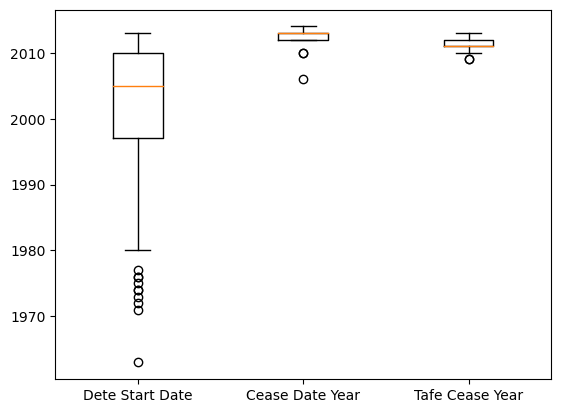

In [39]:
tafe_cease_year = tafe_resignations['cease_date'].dropna() # Create a series from the 'cease_date' column and drop the NaN values.
dete_start_date = dete_resignations['dete_start_date'].dropna() # Create a series from the 'dete_start_date' column and drop the NaN values.
cease_date_year = dete_resignations['cease_date_year'].dropna() # Create a series from the 'cease_date_year' column and drop the NaN values.
data = [dete_start_date, cease_date_year, tafe_cease_year] # Create a list with the three series previously created.
labels = ['Dete Start Date', 'Cease Date Year', 'Tafe Cease Year'] # Create a list with the labels we will use for the three series previously created.

plt.boxplot(data, labels=labels) # Create the boxplot of the data list.

#plt.show()


In principle, we don't observe any major issues with the years. There is no apparent overlap that might be caused by incongruences between start and cease years.




## Create a new column

As a reminder, one of the questions we want to answer is the following: 

Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

In order to answer this, we need information regarding the working period of time for each employee.

Now that we've verified the years in the *dete_resignations* dataframe, we'll use them to create a new column that will give us the period of time information:

* In the Human Resources field, the length of time an employee spent in a workplace is referred to as their years of service.
* The *tafe_resignations* dataframe already contains a *service* column, which has been renamed to *institute_service*. 
* In order to analyze both surveys together, we'll have to create a corresponding *institute_service* column in *dete_resignations*. In order to create that column, we will use the *dete_start_date* and *cease_date_year* from dete_resignations dataframe.

In [40]:
dete_resignations['institute_service'] = dete_resignations['cease_date_year'] - dete_resignations['dete_start_date'] # Calculate the working period of time named as institute_service.

/var/folders/s1/_jzrgjv92z3ggw8vdrsxkxj80000gn/T/ipykernel_28479/903219196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dete_resignations['institute_service'] = dete_resignations['cease_date_year'] - dete_resignations['dete_start_date'] # Calculate the working period of time named as institute_service.


In [41]:
dete_resignations['institute_service'].head() # Quick check of the new column.

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

## Identify Dissatisfied Employees

Next, we'll identify any employees who resigned because they were dissatisfied. Below we enumerate the columns we'll use to categorize employees as "dissatisfied" from each dataframe:


1. tafe_survey_updated:
* Contributing Factors. Dissatisfaction
* Contributing Factors. Job Dissatisfaction


2. dete_survey_updated:
* job_dissatisfaction
* dissatisfaction_with_the_department
* physical_work_environment
* lack_of_recognition
* lack_of_job_security
* work_location
* employment_conditions
* work_life_balance
* workload



If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column. 

After implementing our modifications, the updated *dissatisfied* column will now contain the following values:

* True: indicates that an individual resigned due to dissatisfaction in some way.
* False: indicates that an individual resigned for reasons other than job dissatisfaction.
* NaN: indicates that the value is missing.






**1. *tafe_survey*:**

In [42]:
tafe_resignations.columns # Check the columns of tafe_resignations dataframe we are focused on 'Contributing Factors. Dissatisfaction', and 'Contributing Factors. Job Dissatisfaction'.

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [43]:
print('Unique values of the Contributing Factors. Dissatisfaction column:\n\n ', tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()) # Check the unique values
print('\n\n\nUnique values of the Contributing Factors. Job Dissatisfaction column:\n\n ', tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()) # Check the unique values

Unique values of the Contributing Factors. Dissatisfaction column:

  -                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64



Unique values of the Contributing Factors. Job Dissatisfaction column:

  -                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


We observe that there are many values represented by a '-' symbol in both columns. Those values will be modified as False. The rows with no values will be modified as Null values. The remaining rows will be treated as True.

In [44]:
# Create a function to update the values in the contributing factors columns to be either True, False, or NaN.
def update_vals(value):
    if value == '-': 
        return False
    elif pd.isnull(value):
        return np.nan 
    else: return True

In [45]:
tafe_resignations_copy = tafe_resignations.copy()
tafe_resignations_copy[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']] = tafe_resignations_copy[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].applymap(update_vals)
# We applied the update_vals function to the the columns of interest for the tafe_resignations dataframe.

In [46]:
tafe_resignations_up = tafe_resignations_copy

In [47]:
tafe_resignations_up['Contributing Factors. Dissatisfaction'].value_counts(dropna=False) # Check the unique values after the updates.

False    277
True      55
NaN        8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [48]:
tafe_resignations_up['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False) # Check the unique values after the updates

False    270
True      62
NaN        8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [49]:
tafe_resignations_up[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].head() # Quick check of the tafe_resignation after the updates.

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False


Now we are going to create the new *dissatisfied* column. First we create a function which set the value as True if at least one of all the selected columns presents a True value. Otherwise it sets the value as False. However, if all the selected columns present null values we also set the value as null for the new column.


In [50]:
# Create a function which set the True, False and Null values. The selected columns are represented by dissatisfied_columns.
def check_for_true(row, dissatisfied_columns):
    at_least_one_true = any(row[column] is True for column in dissatisfied_columns)
    all_nan = all(pd.isnull(row[column]) for column in dissatisfied_columns)

    if at_least_one_true:
        return True
    elif all_nan:
        return None
    else:
        return False


tafe_resignations_up_dissatisfied_columns = ['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']

# Apply the function to create the new 'dissatisfied' column.
tafe_resignations_up['dissatisfied'] = tafe_resignations_up.apply(check_for_true, axis=1, args=(tafe_resignations_up_dissatisfied_columns,))


In [51]:
tafe_resignations_up.columns # Check all the columns after the uptade.

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service', 'dissatisfied'],
      dtype='object')

In [52]:
tafe_resignations_up['dissatisfied'].value_counts(dropna=False) # Check the False and True values of the new dissatisfied column

False    241
True      91
None       8
Name: dissatisfied, dtype: int64

**2. *dete_survey*:**

In [53]:
dete_resignations.head() # Quick scanning of the dataset.

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,cease_date_year,institute_service
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,2012.0,7.0
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,2012.0,18.0
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,2012.0,3.0
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,2012.0,15.0
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,2012.0,3.0


In [54]:
dete_resignations['workload'].value_counts() # Check the unique values

False    284
True      27
Name: workload, dtype: int64

In [55]:
dete_resignations['dissatisfaction_with_the_department'].value_counts() # Check the unique values

False    282
True      29
Name: dissatisfaction_with_the_department, dtype: int64

We will use the same previous *check_for_true* function to create the new column for this dataset. We will just set a value as True if at least one of the columns presents a True value. Otherwise we will consider it as False. 

In [56]:
dete_resignations_up = dete_resignations.copy() 

In [57]:
# Create a list with all the columns of interest.
dete_resignations_up_dissatisfied_columns = ['job_dissatisfaction',
'dissatisfaction_with_the_department',
'physical_work_environment',
'lack_of_recognition',
'lack_of_job_security',
'work_location',
'employment_conditions',
'work_life_balance',
'workload']

In [58]:
# Apply the previous function to create the new 'dissatisfied' column.
dete_resignations_up['dissatisfied'] = dete_resignations_up.apply(check_for_true, axis=1, args=(dete_resignations_up_dissatisfied_columns,))

dete_resignations_up['dissatisfied'].head() # Quick inspection of the new column.


3     False
5      True
8     False
9      True
11    False
Name: dissatisfied, dtype: bool

In [59]:
dete_resignations_up['dissatisfied'].value_counts(dropna=False) # Check the counts of the True and False values for the new dissatisfied column.


False    162
True     149
Name: dissatisfied, dtype: int64

Now, we're finally ready to combine our datasets. Our end goal is to aggregate the data according to the *institute_service* column and finally compare it with the *dissatisfied* column.

## Combining the Data ##

First of all, we will add an *institute* column to distinguish the data from each survey when we merge them. Subsequently, we will combine the dataframes and eliminate any remaining columns that we don't need.

In [60]:
# Quick inspection of 'institute_service' and 'dissatisfied' columns for dete_resignations dataframe.
dete_resignations_up[['institute_service', 'dissatisfied']].head() 

,institute_service,dissatisfied
3,7.0,False
5,18.0,True
8,3.0,False
9,15.0,True
11,3.0,False


In [61]:
# Quick inspection of 'institute_service' and 'dissatisfied' columns for tafe_resignations dataframe.
tafe_resignations_up[['institute_service', 'dissatisfied']].head()

,institute_service,dissatisfied
3,NaN,False
4,3-4,False
5,7-10,False
6,3-4,False
7,3-4,False


In [62]:
dete_resignations_up['institute_service'].value_counts() # Check unique values for the 'institute_service' column.

5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
2.0     14
9.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
17.0     6
10.0     6
22.0     6
12.0     6
14.0     6
18.0     5
16.0     5
24.0     4
23.0     4
11.0     4
32.0     3
39.0     3
21.0     3
19.0     3
25.0     2
28.0     2
26.0     2
30.0     2
36.0     2
33.0     1
35.0     1
49.0     1
38.0     1
41.0     1
27.0     1
42.0     1
29.0     1
34.0     1
31.0     1
Name: institute_service, dtype: int64

In [63]:
tafe_resignations_up['institute_service'].value_counts() # Check unique values for the 'institute_service' column.

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

In [64]:
dete_resignations_up['institute'] = 'DETE' # Add the institute column
tafe_resignations_up['institute'] = 'TAFE' # Add the institute column

In [65]:
dete_resignations_up.shape # Check the number of rows and columns for the dataframes that will be combined.

(311, 39)

In [66]:
tafe_resignations_up.shape # Check the number of rows and columns for the dataframes that will be combined.

(340, 25)

In [67]:
combined = pd.concat([dete_resignations_up,tafe_resignations_up], ignore_index = True) # Combine both dataframes.

In [68]:
combined.shape # Check of number of rows and columns for the resulting dataframe.

(651, 54)

We've got a dataframe with 651 rows and 54 columns. The rows were correctly combined.

In [69]:
combined.columns # Check the columns of the resulting dataframe.

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'cease_date_year',
       'institute_service', 'dissatisfied', 'institute', 'Institute',
       'WorkArea', 'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-e

In [70]:
dete_resignations_up.columns # Check columns for the dete_resignations dataframe.

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'cease_date_year',
       'institute_service', 'dissatisfied', 'institute'],
      dtype='object')

In [71]:
tafe_resignations_up.columns # Check columns for the tafe_resignations dataframe.

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service', 'dissatisfied', 'institute'],
      dtype='object')

There are 10 common columns between both dataframes. The number of columns for the resulting dataframe is correct.

In [72]:
# Verify the number of non null values in each column
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
cease_date_year                                        300
none_of_the_above                                      311
work_life_balance                                      311
traumatic_incident                                     311
ill_health                                             311
study/travel                                           3

We will keep the columns with more than 500 non-null values to ensure that we retain data from columns that have a substantial amount of information. Our columns of interest are included in that group.

In [73]:
combined_updated = combined.dropna(thresh=500,axis=1) # Drop the columns with less that 500 non-null values.

In [74]:
combined_updated.shape # Check the number of rows and columns for the combined_updated dataframe.

(651, 10)

In [75]:
combined_updated.columns # Check the columns for the combined_updated dataframe.

Index(['id', 'separationtype', 'cease_date', 'position', 'employment_status',
       'gender', 'age', 'institute_service', 'dissatisfied', 'institute'],
      dtype='object')

## Clean the Service Column ##

Before performing some kind of analysis we have to clean the *institute_service* column. 

This column contains values in a couple different forms. We'll convert its values into categories by using the following criteria:

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [76]:
combined_updated['institute_service'].value_counts() # Check the unique values

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
14.0                   6
12.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
32.0                   3
39.0                   3
19.0                   3
21.0                   3
36.0                   2
25.0                   2
30.0                   2
26.0                   2
28.0                   2
49.0                   1


First of all , we'll extract the years of service from each value in the *institute_service* column. 

In [77]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype('str') # Change the type of the series to 'str'.

/var/folders/s1/_jzrgjv92z3ggw8vdrsxkxj80000gn/T/ipykernel_28479/332119646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['institute_service'] = combined_updated['institute_service'].astype('str') # Change the type of the series to 'str'.


In [78]:
combined_updated['years_of_service_extraction'] = combined_updated['institute_service'].str.extract(r'(\d+)') # Extract the years of service by using a regular expression pattern.

/var/folders/s1/_jzrgjv92z3ggw8vdrsxkxj80000gn/T/ipykernel_28479/1230271330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['years_of_service_extraction'] = combined_updated['institute_service'].str.extract(r'(\d+)') # Extract the years of service by using a regular expression pattern.


In [79]:
combined_updated['years_of_service_extraction'].value_counts() # Check the unique values of new column with the extracted years.

1     159
3      83
5      56
7      34
11     30
0      20
20     17
6      17
4      16
9      14
2      14
13      8
8       8
15      7
17      6
10      6
22      6
14      6
12      6
18      5
16      5
24      4
23      4
21      3
19      3
39      3
32      3
25      2
28      2
26      2
36      2
30      2
34      1
27      1
29      1
42      1
33      1
41      1
35      1
49      1
38      1
31      1
Name: years_of_service_extraction, dtype: int64

In [80]:
combined_updated['years_of_service_extraction'] = combined_updated['years_of_service_extraction'].astype('float') # Convert the column to float type.

/var/folders/s1/_jzrgjv92z3ggw8vdrsxkxj80000gn/T/ipykernel_28479/2769548120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['years_of_service_extraction'] = combined_updated['years_of_service_extraction'].astype('float') # Convert the column to float type.


In [81]:
print(type(combined_updated['years_of_service_extraction'][3])) # Check the conversion was correct.

<class 'numpy.float64'>


In [82]:
# Function to convert years of service into categories.
def stage_career(value):
    if pd.isnull(value):
        return np.nan
    if value < 3:
        return 'New'
    elif 3 <= value <= 6:
        return 'Experienced'
    elif 7 <= value <= 10:
        return 'Established'
    elif value > 10:
        return 'Veteran'
    
    
# New column with the categories info by using the previous function.    
combined_updated['service_cat'] = combined_updated['years_of_service_extraction'].apply(stage_career)    

/var/folders/s1/_jzrgjv92z3ggw8vdrsxkxj80000gn/T/ipykernel_28479/1293454555.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['service_cat'] = combined_updated['years_of_service_extraction'].apply(stage_career)


In [83]:
combined_updated['service_cat'].value_counts() # Check the unique values of the new column with the categories info.

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

## Perform Initial Analysis

We will address the following questions:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

To answer these questions, we will first fill in the missing values in the *dissatisfied* column with the most common value, which is False. 
Next, we will compute the percentage of employees who resigned due to dissatisfaction in each *service_cat* group and visualize the results. Finally, we will explore the age ranges and the number of resignations due to dissatisfaction in each range.  

In [84]:
combined_updated['dissatisfied'].value_counts(dropna=False) # Check the counts for each value in dissatisfied column.

False    403
True     240
None       8
Name: dissatisfied, dtype: int64

In [85]:
# Replace missing values with the most frequent value, False.
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

/var/folders/s1/_jzrgjv92z3ggw8vdrsxkxj80000gn/T/ipykernel_28479/3257560845.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)


In [86]:
combined_updated['service_cat'].value_counts(dropna=False) # Check the unique values and their counts in service_cat column.

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

In [87]:
# Calculate the percentage of employees who resigned due to dissatisfaction in each category
service_dissatisfied_percentage = pd.pivot_table(combined_updated,index = 'service_cat',values='dissatisfied')

<Axes: xlabel='service_cat'>

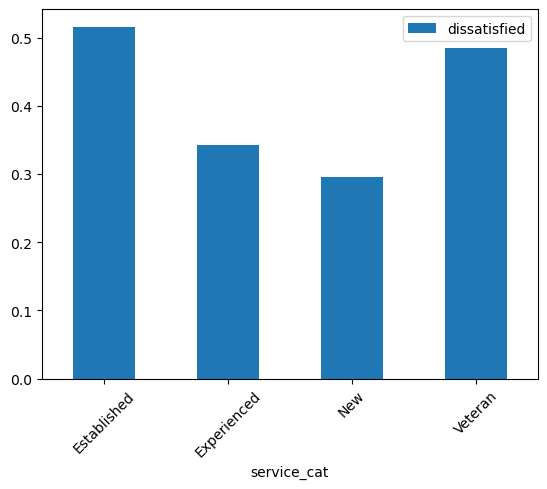

In [88]:
%matplotlib inline
service_dissatisfied_percentage.plot(kind='bar',rot=45) # Plot the results

**Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?**


Based on this preliminary analysis, we can provisionally infer that employees who have served for 7 or more years are more prone to resign due to job dissatisfaction compared to those with less than 7 years of service.

In [89]:
combined_updated.columns # Check the columns 

Index(['id', 'separationtype', 'cease_date', 'position', 'employment_status',
       'gender', 'age', 'institute_service', 'dissatisfied', 'institute',
       'years_of_service_extraction', 'service_cat'],
      dtype='object')

In [90]:
combined_updated['age'].value_counts() # Check unique values for the age

51-55            71
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
31  35           32
26  30           32
21-25            29
56 or older      29
31-35            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

There are inconsistencies in the formatting of age ranges with double spaces. We will replace them with hyphens to standardize the values.


In [91]:
combined_updated['age'] = combined_updated.iloc[:,6].str.replace("  ","-") 
# Standardize the age range values by replacing double spaces with hyphens.

/var/folders/s1/_jzrgjv92z3ggw8vdrsxkxj80000gn/T/ipykernel_28479/1400616626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['age'] = combined_updated.iloc[:,6].str.replace("  ","-")


In [92]:
combined_updated['age'].value_counts(dropna=False).sort_index() # Quick scanning of the updated 'age' column.

20 or younger    10
21-25            62
26-30            67
31-35            61
36-40            73
41-45            93
46-50            81
51-55            71
56 or older      29
56-60            26
61 or older      23
NaN              55
Name: age, dtype: int64

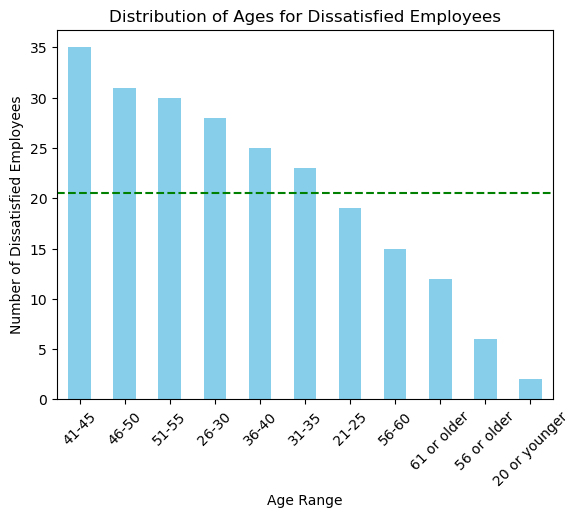

In [93]:
dissatisfied_age_counts = combined_updated.loc[combined_updated['dissatisfied'] == True, 'age'].value_counts(dropna=True)

# Plot bar plot
dissatisfied_age_counts.plot(kind='bar', rot=45, color='skyblue')

# Add a horizontal line marking the mean value of the number of resignations.
plt.axhline(y=dissatisfied_age_counts.mean(), color='green', linestyle='--', label='Mean')
plt.xlabel('Age Range')
plt.ylabel('Number of Dissatisfied Employees')
plt.title('Distribution of Ages for Dissatisfied Employees')
plt.show()

**Are younger employees resigning due to some kind of dissatisfaction? What about older employees?**

Resignations due to dissatisfaction are notably prominent among employees aged 26 to 55. Interestingly, the data suggests that the youngest and oldest age groups experience fewer resignations attributed to dissatisfaction. This might indicate a potential trend where dissatisfaction-driven resignations peak in the middle-age range, declining at both ends of the age spectrum.  

# Conclusions

In summary, the preliminary analysis provides valuable insights into resignation patterns based on service length and age groups. Employees who have devoted 7 or more years to the institutes appear more susceptible to resigning due to job dissatisfaction than their counterparts with less than 7 years of service. Additionally, resignations linked to dissatisfaction are notably prevalent among individuals aged 26 to 55, indicating a potential peak in dissatisfaction-driven resignations within the middle-age range. Interestingly, both the youngest and oldest age groups exhibit fewer resignations attributable to dissatisfaction, suggesting a declining trend at the extremes of the age spectrum. These findings underscore the importance of considering both tenure and age when exploring the dynamics of resignations in relation to job satisfaction.